# 2.- Indicadores de Tendencia
#### ¿Qué es un Indicador de Tendencia?
Un indicador de tendencia es una herramienta de análisis técnico utilizada para identificar la dirección general del mercado o de un activo específico (como una acción, un índice o una criptomoneda). Los indicadores de tendencia ayudan a determinar si el mercado está en una tendencia alcista (precios subiendo), bajista (precios bajando) o lateral (precios moviéndose dentro de un rango sin una dirección clara).

#### ¿Por Qué Son Importantes?

- _Identificación de la Dirección del Mercado_: Los indicadores de tendencia ayudan a identificar si el mercado está subiendo, bajando o moviéndose de manera lateral. Esto es crucial para tomar decisiones informadas sobre cuándo comprar, vender o mantener una posición.
- _Reducción del Ruido del Mercado_: En el corto plazo, los precios pueden fluctuar de manera caótica debido a múltiples factores. Los indicadores de tendencia suavizan estas fluctuaciones para mostrar una visión más clara de la dirección general.
- _Confirmación de la Tendencia_: Ayudan a confirmar la dirección de la tendencia observada, lo que puede ser útil para validar las decisiones comerciales.
- _Señales de Entrada y Salida_: Proporcionan señales sobre cuándo entrar o salir del mercado. Por ejemplo, cuando una acción cruza una media móvil hacia arriba, podría ser una señal de compra, y cuando cruza hacia abajo, podría ser una señal de venta.

#### Algunos ejemplos de indicadores de tendencia
- Media Móvil Simple $SMA$
- Media Móvil Exponencial $EMA$
- Media Móvil Ponderada $WMA$
- Bandas de Bollinger
- Indicador de Convergencia/Divergencia de Medias Móviles $MACD$
- Parabolic SAR
- Índice Direccional Medio $ADX$

#### ¿Cuales estudiaremos aquí?
- Medias móviles
- ADX
- Bandas de Bollinger



## 2.1.- Medias Moviles
Las medias móviles son indicadores de análisis técnico que suavizan los precios de un activo a lo largo de un período de tiempo específico para identificar la dirección general de la tendencia. Hay varios tipos de medias móviles, pero las dos más comunes son la Media Móvil Simple $SMA$ y la Media Móvil Exponencial $EMA$.



### 2.1.1 Simple Moving Average - Media Móvil Simple - _(SMA)_

**Descipción:** 

La Media Móvil Simple $SMA$ es el promedio aritmético de los precios de cierre de un activo durante un período de tiempo específico. Se utiliza para suavizar los datos de precios y reducir el "ruido" para identificar la tendencia subyacente.

**Formula:**

La fórmula para la Media Móvil Simple $SMA$ es:

$$
\text{SMA} = \frac{P_1 + P_2 + \ldots + P_n}{n}
$$

Donde:
- $P_1$, $P_2$, ..., $P_n$ son los precios de cierre de los últimos n días.
- $n$ es el número de días del período.

**Algoritmo:**
1. Suma los precios de cierre de los últimos $n$ días.
2. Divide la suma entre $n$ para obtener la SMA.

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre $P_t$ |
|-----|------------------|
| 1   | 20               |
| 2   | 21               |
| 3   | 22               |
| 4   | 23               |
| 5   | 24               |

La $SMA$ de 5 días se calcula como:

$$
\text{SMA} = \frac{20 + 21 + 22 + 23 + 24}{5} = 22
$$





In [142]:
%pip install pandas_ta
%pip install setuptools
%pip install openpyxl



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [143]:
import yfinance as yf
import datetime as dt
import pandas as pd
import plotly.graph_objects as go
import nbformat
import plotly.io as pio
import pandas_ta as ta
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import os 
import numpy as np 

In [144]:
# traemos los datos

# EJEMPLO CON YAHOO FINANZAS
ticker_symbol = 'BTC-USD'
ticker = yf.Ticker(ticker_symbol)

# Obtener el historial de precios
years=5
end_date= dt.datetime.now() # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los ultimos datos
start_date = end_date- dt.timedelta(365*years) # fecha en formato 'YYYY-MM-DD' en la que queremos obtener los primeros datos
period='5d' # 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
interval='1d' # 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo

# bajamos los datos
data = ticker.history(start=start_date, end=end_date, interval=interval)
# ticker_data=ticker.history(period=period, interval=interval)
# print(ticker_data)
# data.head()

$BTC-USD: possibly delisted; No price data found  (1d 2019-06-30 13:22:57.950896 -> 2024-06-28 13:22:57.950896)


In [145]:
periodo = 50
nombre_calculada = 'SMA_'+str(periodo)+'_calculada'
nombre_pd ='SMA_'+str(periodo)+'_pd'
nombre_pd_ta = 'SMA_'+str(periodo)+'_ta'
nombre_columna_precio = 'Close'

In [146]:
# cogemos los valores de los precios de cierre
close_prices = data[nombre_columna_precio].values

# creamso un array del tamaño de los precios de cierre con valores nan
sma_50_calculada = np.full_like(close_prices, np.nan)

# definimos el periodo de la media movil
periodo = 50

for i in range(close_prices.size):
    if i >= periodo-1:
        slice_data = close_prices[i - periodo + 1:i + 1] # el i+1 de la segunda parte de la expresion es porque si solo pusiera i, no incluye ese valor. hay que sumarle 1
        sma_50_calculada[i] = np.nanmean(slice_data)  # Calcula la media ignorando NaNs usando np.nanmean
    else:
        sma_50_calculada[i] = np.nan
        
data[nombre_calculada] = sma_50_calculada

In [147]:
# SMA Pandas
data[nombre_pd] = data[nombre_columna_precio].rolling(window=periodo).mean()

In [148]:
# SMA Pandas TA
data['SMA_50_ta'] = ta.sma(data[nombre_columna_precio], length=periodo)

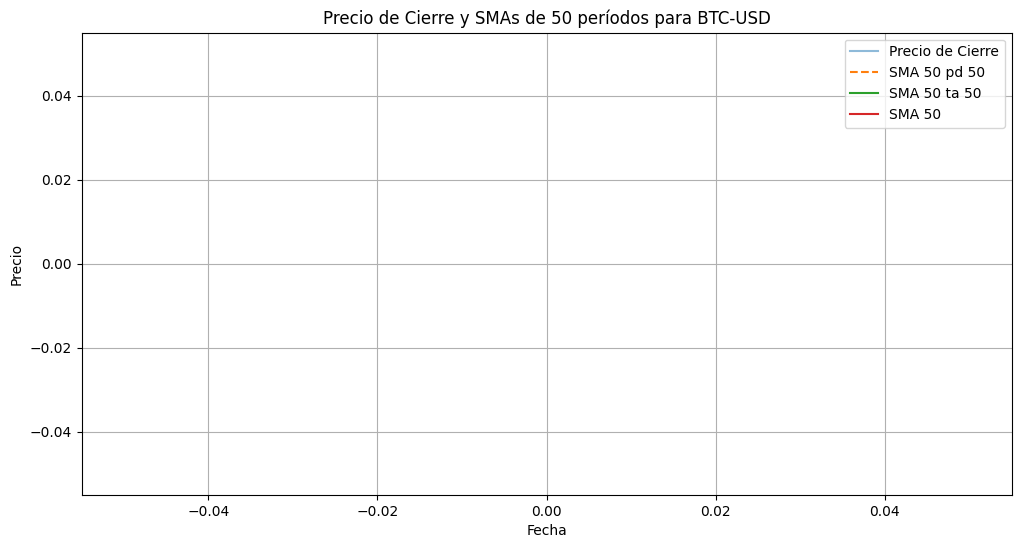

In [149]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data[nombre_pd], label='SMA 50 pd '+str(periodo), linestyle='--')
plt.plot(data.index, data[nombre_pd_ta], label='SMA 50 ta '+str(periodo))
plt.plot(data.index, data[nombre_calculada], label='SMA '+str(periodo))
plt.title(f'Precio de Cierre y SMAs de 50 períodos para {ticker_symbol}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='SMA '+str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y SMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True,  # Mostrar slider de zoom
                  template='plotly_dark')  # Estilo oscuro

# Mostrar el gráfico interactivo
fig.show()

### 2.1.2 Exponential Moving Average - Media Móvil Exponencial - $EMA$

**Descripcion:**

La $EMA$ (Exponential Moving Average) es un tipo de media móvil que otorga más peso a los precios recientes, lo que la hace más sensible a los cambios recientes en el precio de un activo.

**Formula:**

La fórmula para calcular la $EMA$ en el período es:
$$
\text{EMA}_t = (P_t \times \alpha) + (\text{EMA}_{t-1} \times (1 - \alpha))
$$

donde:
$$
\alpha = \frac{smoothing factor}{n + 1}
$$

- $smoothing factor$ normalmente es igual a 2
- $P_t$ es el precio en el tiempo $t$.
- $EMA_t$ es el valor de la EMA en el tiempo $t$.
- $EMA_{t-1}$ es el valor de la EMA en el tiempo ${t-1}$
- $n$ es el número de períodos.

**Algoritmo:**

1. Calcular el valor inicial, es decir, la $EMA_1$. Está se define como la $SMA$ del periodo. Los valores anteriores serian $NaN$
2. Usar la fórmula de la $EMA$ para calcular los valores siguientes:

**Ejemplo numérico:**

Supongamos que tenemos los precios de cierre de una acción durante los últimos 5 días:

| Día | Precio de Cierre $P_t$ |
|-----|--------------------------|
| 1   | 20                       |
| 2   | 21                       |
| 3   | 22                       |
| 4   | 23                       |
| 5   | 24                       |

Primero, calculamos el factor de suavizamiento $\alpha$ para una EMA de 5 días:

$$
\alpha = \frac{2}{n + 1} = \frac{2}{5 + 1} = 0.333
$$

- Día 1: $EMA_{1}$ = $SMA$ 
- Día 2: $EMA_{2}$ = $(21 \times \alpha) + (EMA_{1} \times (1 - \alpha)) = 20.333$
- Día 3: $EMA_{3}$ = $(22 \times \alpha) + (EMA_{2} \times (1 - \alpha)) = 20.889$
- Día 4: $EMA_{4}$ = $(23 \times \alpha) + (EMA_{3} \times (1 - \alpha)) = 21.593$
- Día 5: $EMA_{5}$ = $(24 \times \alpha) + (EMA_{4} \times (1 - \alpha)) = 22.395$





In [151]:
periodo = 50
nombre_calculada = 'EMA_'+str(periodo)+'_calculada'
nombre_pd ='EMA_'+str(periodo)+'_pd'
nombre_pd_ta = 'EMA_'+str(periodo)+'_ta'

In [152]:
close_prices = data[nombre_columna_precio].values
smoothing = 2
alpha = smoothing/(periodo+1)
ema_calculada = np.full_like(close_prices, np.nan)

sma = np.mean(close_prices[:periodo])

ema_calculada[periodo-1] = sma

for i in range(periodo, len(close_prices)):    
    # Pt = close_prices[i]
    # ema_t_minus_1 = ema_calculada[i-1] 
    # ema_t = (close_prices[i]*alpha)+(ema_calculada[i-1]*(1-alpha))
    ema_calculada[i] = (close_prices[i]*alpha)+(ema_calculada[i-1]*(1-alpha))

data[nombre_calculada] = ema_calculada


c:\Users\macPRO\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

c:\Users\macPRO\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



IndexError: index 49 is out of bounds for axis 0 with size 0

In [ ]:
# Calculando la EMA de 50 días con pandas 
data[nombre_pd] = data[nombre_columna_precio].ewm(span=periodo, adjust=False).mean()


In [ ]:
# Calcular la EMA con pandas_ta
data[nombre_pd_ta] = ta.ema(data[nombre_columna_precio], length=periodo)


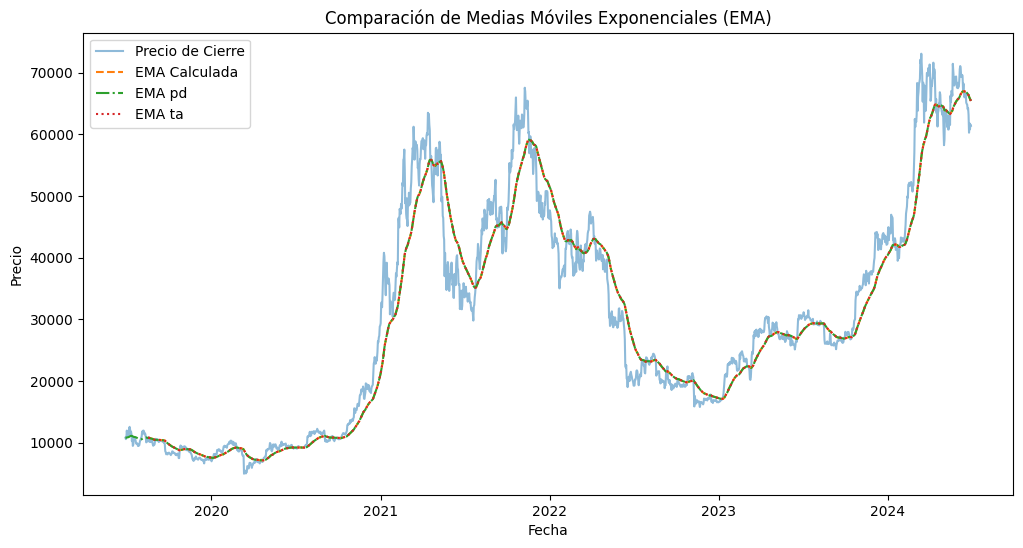

In [ ]:
# Graficar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data[nombre_calculada], label='EMA Calculada ', linestyle='--')
plt.plot(data.index, data[nombre_pd], label='EMA pd', linestyle='-.')
plt.plot(data.index, data[nombre_pd_ta], label='EMA ta', linestyle=':')
plt.title('Comparación de Medias Móviles Exponenciales (EMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [ ]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='EMA ' +str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y EMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True,  # Mostrar slider de zoom
                  template='plotly_dark')  # Estilo oscuro

# Mostrar el gráfico interactivo
fig.show()


### 2.1.3 Weighted Moving Average - Media Móvil Ponderada - _WMA_

**Descripcion:**

**Formula:**

**Ejemplo numérico:**

**Algoritmo:**


In [ ]:
# variables
periodo = 50
pesos=np.array(range(1,periodo+1,1))
nombre_calculada = 'WMA_'+str(periodo)+'_calculada'
nombre_pd ='WMA_'+str(periodo)+'_pd'
nombre_pd_ta = 'WMA_'+str(periodo)+'_ta'

In [ ]:
# manual    
wma = np.full_like(data[nombre_columna_precio],np.nan)
precios = data[nombre_columna_precio].values

for i in range(periodo, len(data[nombre_columna_precio])):
    # array_precios = precios[i-periodo:i]
    # resultado = np.multiply(array_precios,pesos)
    # suma_precios = np.sum(resultado)
    # wma[i] = suma_precios/pesos.sum()
    
    wma[i-1] = np.sum(np.multiply( precios[i-periodo:i],pesos))/pesos.sum()

data[nombre_calculada] = wma
wma

array([           nan,            nan,            nan, ...,
       66444.10926777, 66255.22886949,            nan])

In [ ]:
# pandas
data[nombre_pd] = data[nombre_columna_precio].rolling(window=periodo).apply(lambda prices: np.dot(prices, pesos) / pesos.sum(), raw=True)


In [ ]:
# pandas TA
data[nombre_pd_ta] = ta.wma(data[nombre_columna_precio], length=periodo)

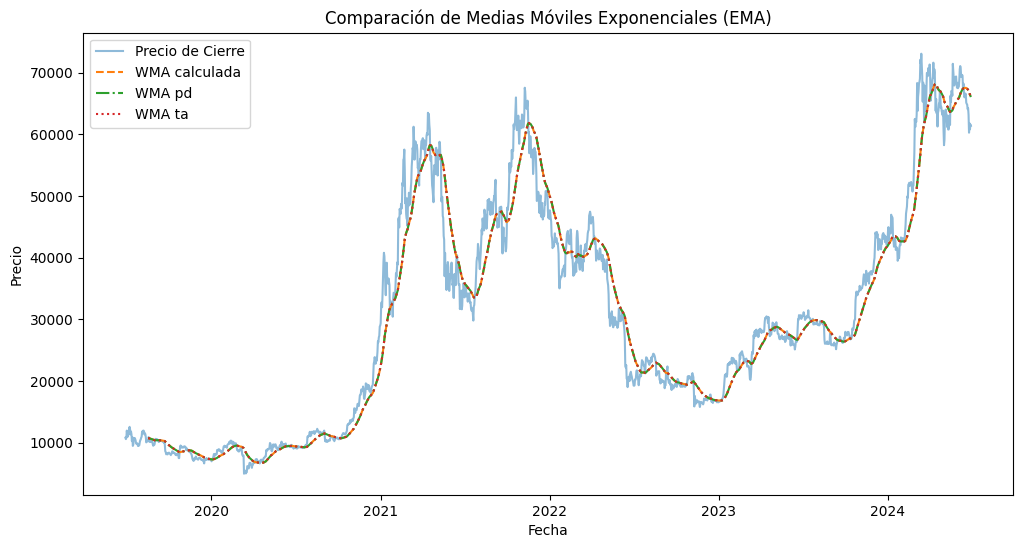

In [ ]:
# Graficar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(data.index, data[nombre_columna_precio], label='Precio de Cierre', alpha=0.5)
plt.plot(data.index, data[nombre_calculada], label='WMA calculada', linestyle='--')
plt.plot(data.index, data[nombre_pd], label='WMA pd', linestyle='-.')
plt.plot(data.index, data[nombre_pd_ta], label='WMA ta', linestyle=':')
plt.title('Comparación de Medias Móviles Exponenciales (EMA)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [ ]:
# Crear el gráfico interactivo con Plotly
fig = go.Figure()

# Añadir serie de precios de cierre
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_columna_precio], 
                         mode='lines', name='Precio de Cierre', 
                         line=dict(color='green', width=1)))

# Añadir SMA de 50 períodos
fig.add_trace(go.Scatter(x=data.index, y=data[nombre_pd_ta], 
                         mode='lines', name='WMA '+str(periodo), 
                         line=dict(color='blue', width=2)))

# Personalizar el diseño del gráfico
fig.update_layout(title=f'Precio de Cierre y WMA ({ticker_symbol})',
                  xaxis_title='Fecha',
                  yaxis_title='Precio',
                  xaxis_rangeslider_visible=True,  # Mostrar slider de zoom
                  template='plotly_dark')  # Estilo oscuro

# Mostrar el gráfico interactivo
fig.show()